In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("./car_evaluation.csv")
df.head()

,buying_price,maint_cost,doors,person_capacity,lug_boot,saftey,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
df.shape

(1728, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   buying_price     1728 non-null   object
 1   maint_cost       1728 non-null   object
 2   doors            1728 non-null   object
 3   person_capacity  1728 non-null   object
 4   lug_boot         1728 non-null   object
 5   saftey           1728 non-null   object
 6   class            1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
df.isnull().sum()

buying_price       0
maint_cost         0
doors              0
person_capacity    0
lug_boot           0
saftey             0
class              0
dtype: int64

In [12]:
df.columns

Index(['buying_price', 'maint_cost', 'doors', 'person_capacity', 'lug_boot',
       'saftey', 'class'],
      dtype='object')

In [17]:
print(df['buying_price'].unique())
print(df['maint_cost'].unique())
print(df['doors'].unique())
print(df['person_capacity'].unique())
print(df['lug_boot'].unique())
print(df['saftey'].unique())
print(df['class'].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['2' '3' '4' '5more']
['2' '4' 'more']
['small' 'med' 'big']
['low' 'med' 'high']
['unacc' 'acc' 'vgood' 'good']


In [14]:
df.nunique()

buying_price       4
maint_cost         4
doors              4
person_capacity    3
lug_boot           3
saftey             3
class              4
dtype: int64

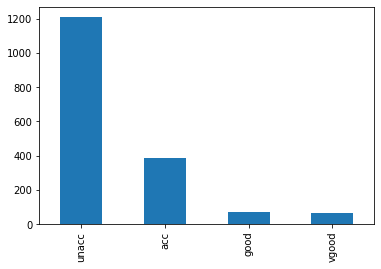

In [18]:
df['class'].value_counts().plot(kind = 'bar')
plt.show()

vhigh    432
high     432
med      432
low      432
Name: buying_price, dtype: int64


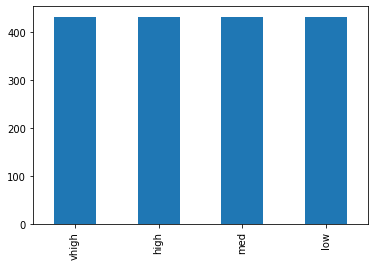

In [20]:
print(df['buying_price'].value_counts())
df['buying_price'].value_counts().plot(kind = 'bar')
plt.show()

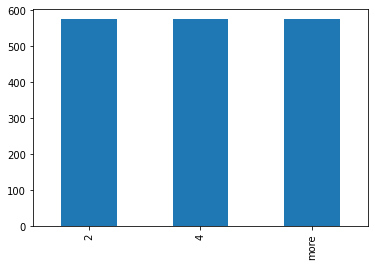

In [21]:
df['person_capacity'].value_counts().plot(kind='bar')
plt.show()

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


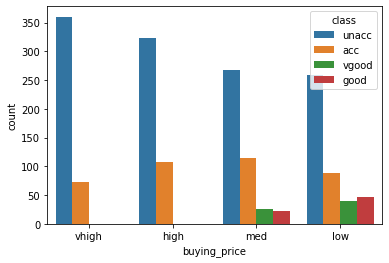

In [22]:
sns.countplot(df['buying_price'],hue=df['class'])
plt.show()

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


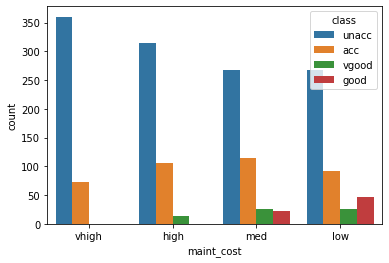

In [36]:
sns.countplot(df['maint_cost'],hue=df['class'])
plt.show()

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import accuracy_score

In [24]:
df.tail()

,buying_price,maint_cost,doors,person_capacity,lug_boot,saftey,class
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [29]:
#independant variable
X = df.iloc[:,:-1].values
#dependant variable
y = df.iloc[:,-1].values

In [30]:
X

array([['vhigh', 'vhigh', '2', '2', 'small', 'low'],
       ['vhigh', 'vhigh', '2', '2', 'small', 'med'],
       ['vhigh', 'vhigh', '2', '2', 'small', 'high'],
       ...,
       ['low', 'low', '5more', 'more', 'big', 'low'],
       ['low', 'low', '5more', 'more', 'big', 'med'],
       ['low', 'low', '5more', 'more', 'big', 'high']], dtype=object)

In [31]:
y

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'good', 'vgood'],
      dtype=object)

### ordinal encoding

In [32]:
from sklearn.preprocessing import OrdinalEncoder

buying_price_category = ['vhigh', 'high', 'med' ,'low']
maint_cost_category = ['vhigh', 'high', 'med' ,'low']
doors_category = ['2' ,'3', '4' ,'5more']
person_capacity_category = ['2', '4', 'more']
saftey_category = ['low' ,'med' ,'high']
lug_boot_category = ['small' ,'med' ,'big']

In [33]:
buying_price_category.reverse()
maint_cost_category.reverse()

In [34]:
oe = OrdinalEncoder(categories=[buying_price_category,maint_cost_category,doors_category,person_capacity_category,saftey_category,lug_boot_category])

X = oe.fit_transform(df[['buying_price','maint_cost','doors','person_capacity','saftey','lug_boot']])

In [35]:
X

array([[3., 3., 0., 0., 0., 0.],
       [3., 3., 0., 0., 1., 0.],
       [3., 3., 0., 0., 2., 0.],
       ...,
       [0., 0., 3., 2., 0., 2.],
       [0., 0., 3., 2., 1., 2.],
       [0., 0., 3., 2., 2., 2.]])

##### Dataset splitting for train & test

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)


array([[0., 3., 3., 0., 1., 0.],
       [1., 2., 1., 1., 0., 2.],
       [0., 1., 2., 0., 0., 0.],
       ...,
       [3., 2., 1., 2., 2., 1.],
       [0., 1., 0., 2., 1., 0.],
       [1., 3., 3., 2., 2., 1.]])

In [40]:
len(y_test)

519

In [41]:
# creating model with entroy
DT = DecisionTreeClassifier(criterion='entropy')
DT.fit(X_train,y_train)
DT

DecisionTreeClassifier(criterion='entropy')

In [66]:
DT.score(X_test,y_test)

0.9807321772639692

### finding the optimal max_depth value using entropy

In [46]:
train_accu = []
test_accu = []
def createModel(depth,criteria):
    DT = DecisionTreeClassifier(criterion=criteria,max_depth=depth)
    DT.fit(X_train,y_train)
    
    train_accu.append(DT.score(X_train,y_train))
    test_accu.append(DT.score(X_test,y_test))
    
    #accuracy = accuracy_score(y_test,y_pred)
    #print('for min_sample_leaf accuracy is : ',accuracy)

In [47]:
for depth in range(1,14):
    createModel(depth,'entropy')

In [57]:
accuracy_frame = pd.DataFrame({'max_depth':range(1,14),'train_accu':train_accu,'test_accu':test_accu})
accuracy_frame.head(5)

,max_depth,train_accu,test_accu
0,1,0.701406,0.697495
1,2,0.788255,0.753372
2,3,0.801489,0.768786
3,4,0.838710,0.820809
4,5,0.874276,0.868979


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


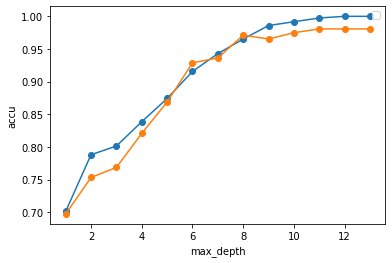

In [53]:
plt.plot(accuracy_frame['max_depth'], accuracy_frame['train_accu'],marker='o')
plt.plot(accuracy_frame['max_depth'], accuracy_frame['test_accu'],marker='o')
plt.xlabel('max_depth')
plt.ylabel('accu')
plt.legend()
plt.show()

In [62]:
def get_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)

### model with entroy 

In [64]:
# 10 is optimal value for max deapth
get_score(DecisionTreeClassifier(criterion='entropy',max_depth=10),X_train,X_test,y_train,y_test)*100

97.495183044316

### model with gini

In [65]:
# 10 is optimal value for max deapth
get_score(DecisionTreeClassifier(criterion='gini',max_depth=10),X_train,X_test,y_train,y_test)*100

98.45857418111753